### **Googleplay Store Analysis and Visualization**
#### Dataset source: Kaggle(Google Play Store Apps)
#### Links: https://bit.ly/2UMcbDI

Team member:

Yi-Ching Tsai

In [665]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

# Import the dataset
df=pd.read_csv('googleplaystore.csv', skiprows=1)
'''
If the above code doesn't work, please run the below code, thank you
df=pd.read_csv('googleplaystore.csv')
'''

" \nIf the above code doesn't work, please run the below code, thank you\ndf=pd.read_csv('googleplatstore.csv')\n"

#### **Understand the Data**

In [666]:
# Read the first five rows in the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [620]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")
print('-------------------------------------------------------------------------')
print('Column names:') # checking column names in this dataset
for i in df.columns:
  print(i)

There are 10841 rows and 13 columns in this dataset.
-------------------------------------------------------------------------
Column names:
App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver


In [621]:
df.info() # to get the overall information about this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [622]:
df.describe(include='all') # get descriptive statistics information of the dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,21,3,93,6,120,1378,2784,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [623]:
df['Category'].unique() # Checking unique categories in the dataset

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [624]:
df['Category'].nunique() # There are 34 different categories

34

In [625]:
df["Size"].nunique() # There are a lot of different App sizes

462

In [626]:
df['Rating'].unique() # Checking unique rating levels in the dataset

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [627]:
df['Rating'].nunique() # There are 40 differrent rating levels

40

In [628]:
df["Content Rating"].unique() # Checking who is permitted to download these Apps

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

#### **Data Cleaning**

In [629]:
df.duplicated().sum() # find the number of duplicated rows in a dataset

483

In [630]:
df=df.drop_duplicates() # Dropping duplicated rows

<Axes: >

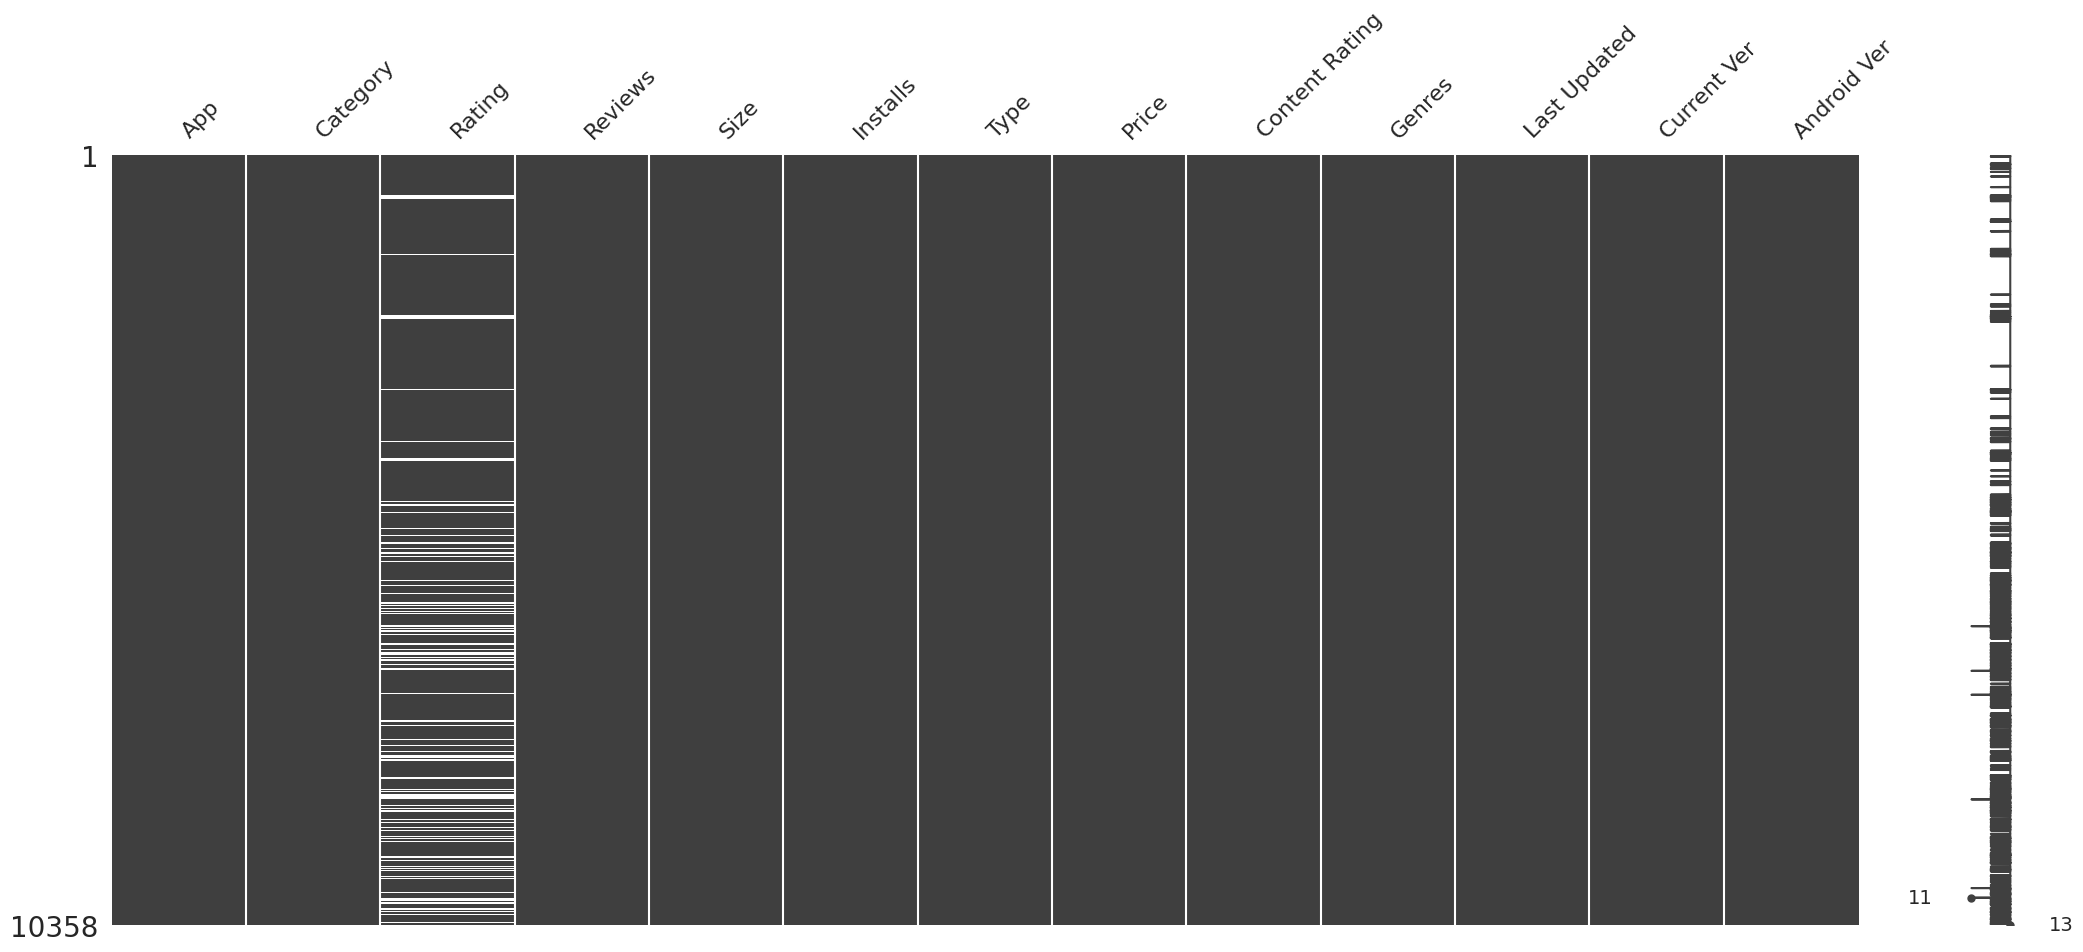

In [631]:
# The matrix below shows the null values for each column of the dataset
msno.matrix(df) # The column of 'Rating' cantains the most null values

In [632]:
df.isnull().sum() # Checking the number of null values for each column

,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [633]:
len(df.columns[df.isnull().sum() > 0]) # There are 5 columns that have null values

5

In [634]:
df=df.dropna() # Dropping the entries where there are missing values

In [635]:
df.isnull().any() # Checking if there is still missing values in this dataset

,0
App,False
Category,False
Rating,False
Reviews,False
Size,False
Installs,False
Type,False
Price,False
Content Rating,False
Genres,False


In [636]:
len(df['App']) # There are 8886 different Apps in this dataset

8886

In [637]:
id=np.arange(8886) # according to number of Apps
df['ID']=id # Create a new column named ID in the dataset so later we can manipulate the dataset easier
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ID
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


In [638]:
df=df.set_index('ID') # Using column 'ID' as an index for this dataset

In [639]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
ID,,,,,,,,,,,,,
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### **Data Exploring**

In [640]:
newdata=pd.DataFrame(df['Type'].value_counts()) # There are 8275 Apps with Free type and 611 Apps with paid type
newdata=newdata.reset_index()
newdata.head()

,Type,count
0,Free,8275
1,Paid,611


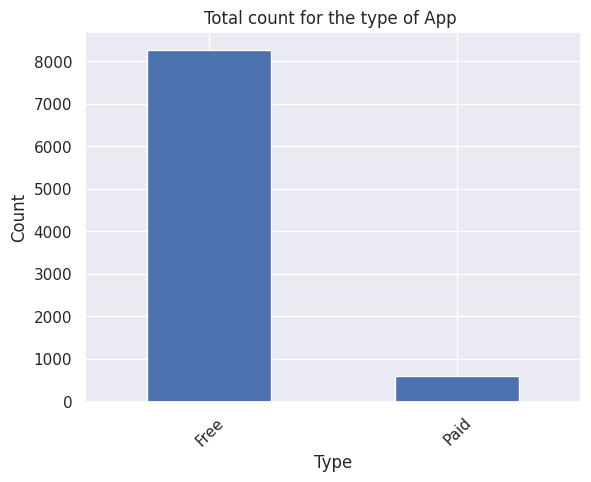

In [641]:
# Create Bar Chart
df["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Total count for the type of App ")
plt.xticks(rotation=45)
plt.show()

#### The above bar chart shows that most Apps are free for downloading while there a few Apps that require people to pay money for getting access to them.

In [642]:
df['Reviews']=df['Reviews'].astype(float) # Converting column 'Rating' to float type so we can apply statistics

In [643]:
df.describe() # descriptive statistics of column Rating & Reviews

,Rating,Reviews
count,8886.000000,8.886000e+03
mean,4.187959,4.730928e+05
std,0.522428,2.906007e+06
min,1.000000,1.000000e+00
25%,4.000000,1.640000e+02
50%,4.300000,4.723000e+03
75%,4.500000,7.131325e+04
max,5.000000,7.815831e+07


In [644]:
# replaces the "," and "Free" to make the column name Intalls contains only numeric value
df['Installs'] = df['Installs'].str.replace(',','').replace('Free', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'])

In [645]:
df['Price']=pd.to_numeric(df['Price'].str.replace('"NT$"', '')) # Converting column 'Price' to numeric data type
'''
In case this code doesn't work, please use the below code to run it again, thank you
'df['Price']=pd.to_numeric(df['Price'].str.replace('$', ''))
'''

"\nIn case this code doesn't work, please use the below code to run it again, thank you\n'df['Installs]=pd.to_numeric(df['Installs].str.replace('$', ''))\n"

In [646]:
dfprice = df[df["Price"] > 0]
pricevals = pd.DataFrame(dfprice["Price"].value_counts()) # Getting the counts of differently priced apps
pricevals1 = pricevals.reset_index()
pricevals1.head()

,Price,count
0,2.99,110
1,0.99,104
2,4.99,68
3,1.99,59
4,3.99,55


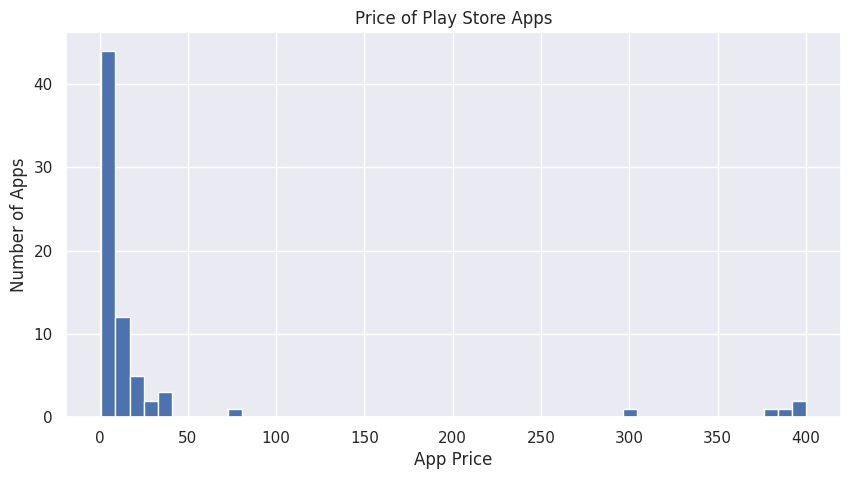

In [647]:
plt.figure(figsize=(10,5))
plt.hist(pricevals1["Price"], bins = 50)
plt.xlabel('App Price')
plt.ylabel('Number of Apps')
plt.title('Price of Play Store Apps')
plt.show()

#### We can see from the graph that most paid apps are very cheap, but a few are very expensive. Some cost almost $400. While most apps are reasonably priced, there are a few unreasonably priced apps that raise the average app price significantly.



In [648]:
df.describe()

,Rating,Reviews,Installs,Price
count,8886.000000,8.886000e+03,8.886000e+03,8886.000000
mean,4.187959,4.730928e+05,1.650061e+07,0.963526
std,0.522428,2.906007e+06,8.640413e+07,16.194792
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,1.000000e+04,0.000000
50%,4.300000,4.723000e+03,5.000000e+05,0.000000
75%,4.500000,7.131325e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [649]:
df_categories = df.groupby('Category')['Installs'].sum() # calculates the total number of installations for each Category in a dataset
df_categories

,Installs
Category,
ART_AND_DESIGN,124228100
AUTO_AND_VEHICLES,53129800
BEAUTY,26916200
BOOKS_AND_REFERENCE,1916291655
BUSINESS,863518120
COMICS,56036100
COMMUNICATION,24152241530
DATING,206522410
EDUCATION,533852000


In [650]:
df.value_counts(["Category"])

,count
Category,
FAMILY,1717
GAME,1074
TOOLS,733
PRODUCTIVITY,334
FINANCE,317
PERSONALIZATION,308
COMMUNICATION,307
LIFESTYLE,305
PHOTOGRAPHY,304


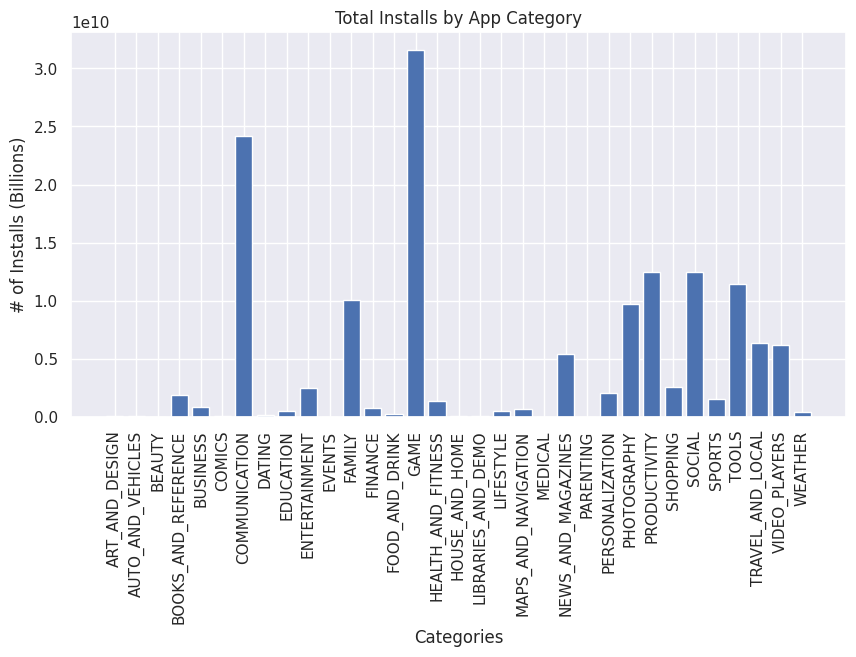

In [651]:
plt.figure(figsize=(10,5))
plt.bar(df_categories.index, df_categories.values) # create the bar chart
plt.xlabel('Categories')
plt.ylabel('# of Installs (Billions)')
plt.xticks(rotation=90)
plt.title('Total Installs by App Category')
plt.show()

#### From the above bar chart, we could know that cateogry 'GAME' has the highest number of installations compared to other categories.

In [652]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
ID,,,,,,,,,,,,,
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [653]:
# Transform the column Installs to log format
df['lnInstalls'] = np.log(df['Installs'])

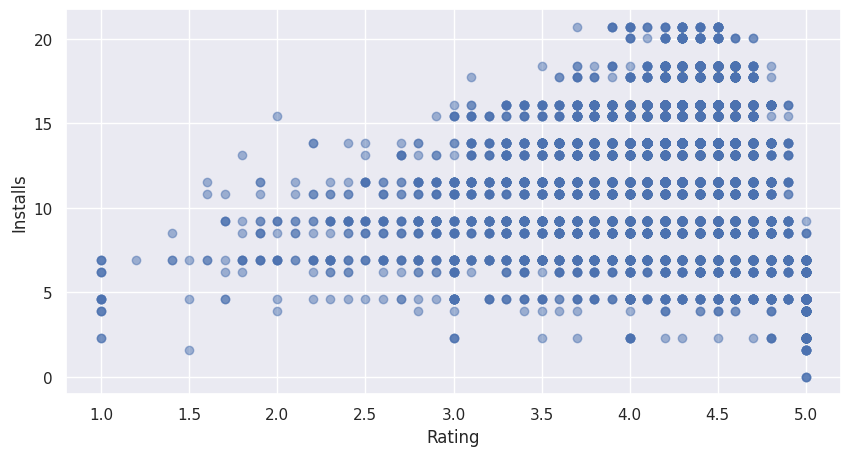

In [654]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Rating'], y=df['lnInstalls'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.show()

#### Taking the natural log of the number of installs shows a more interesting result. The highest number of installs falls between a rating of 4.0 and 4.5. A rating less than 4.0 having lower installs makes sense, since it is a lower rated product. However, a rating above 4.5 is likely because those apps have a lower number of installs, inflating the rating due to a low number of high ratings.

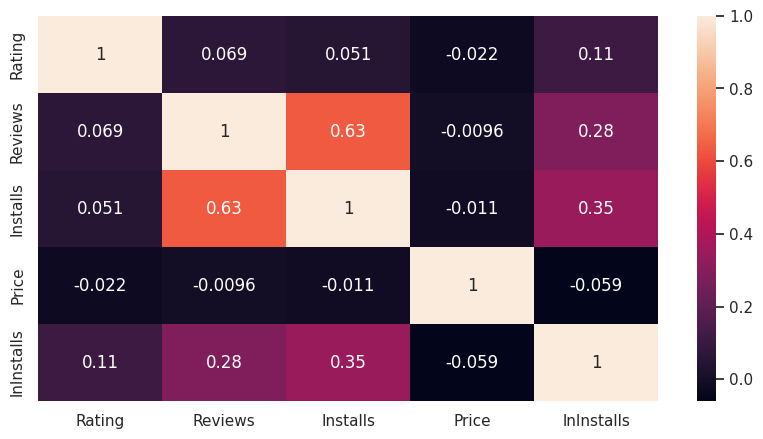

In [655]:
# Create a correlation heatmap to better understand the relationship between each variable
plt.figure(figsize=(10,5))
# only include variables their datatypes are 'floar64' & 'int64' for correlation computation
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True)
plt.show()

#### From the above heatmap, we could know Reviews and Rating has the strongest positive relationship with each other which means that as Review increases, Rating increases as well. However, this heatmap also shows that for Price and Reviews, there is a very weak negative relationship between them.

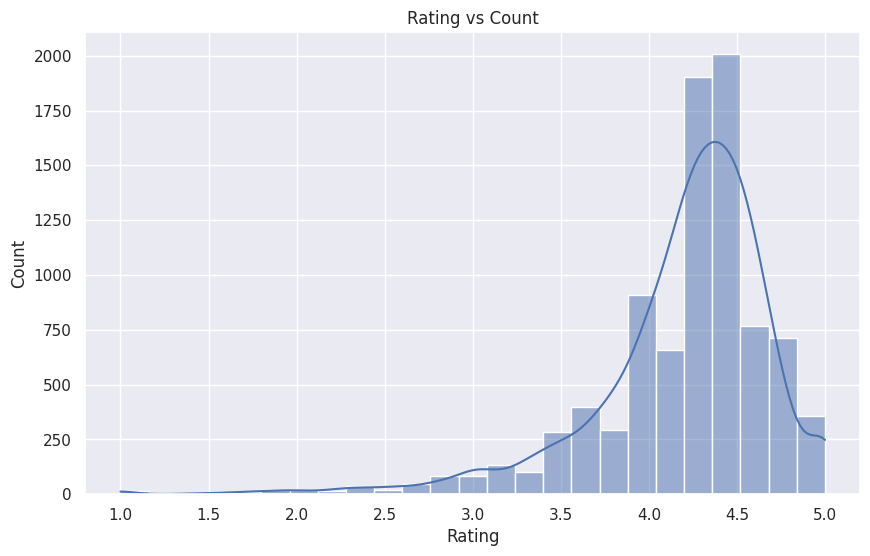

In [656]:
# Create a bar chart with kernel density estimation line
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], bins=25, kde=True)
plt.ylabel('Count')
plt.title('Rating vs Count')
plt.show()

#### The above graph is right-skewed which means that majority of the Apps ahve above 4.0 rating level while there are a few Apps with rating level below 2.5.

### **Find out the average rating for all the apps**


In [657]:
condition=df['Rating'] <= 5
df=df[condition]
print('The average rating for all the apps is: ' + str(df['Rating'].mean()))

The average rating for all the apps is: 4.187958586540625


<ipython-input-658-6acc4e21ff51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].astype(str).str.replace('M', 'e6', regex=True)
<ipython-input-658-6acc4e21ff51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].str.replace('K', 'e3', regex=True)
<ipython-input-658-6acc4e21ff51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

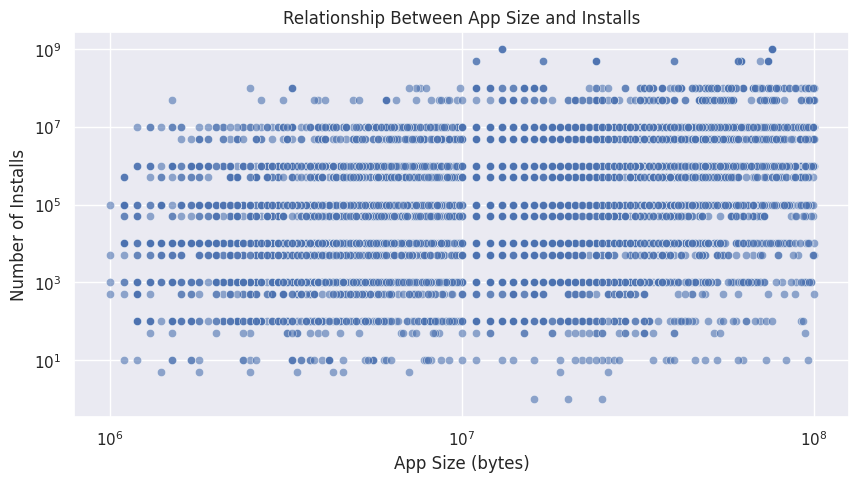

In [658]:
df['Size'] = df['Size'].replace('Varies with device', None)
df=df.dropna(subset=['Size'])
df['Size'] = df['Size'].astype(str).str.replace('M', 'e6', regex=True)
df['Size'] = df['Size'].str.replace('K', 'e3', regex=True)
df['Size']=pd.to_numeric(df['Size'], errors='coerce')
# Create a scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Size', y='Installs', data=df, alpha=0.6)
plt.title('Relationship Between App Size and Installs')
plt.xlabel('App Size (bytes)')
plt.ylabel('Number of Installs')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### The above scatter plot shows that App size has a slight positive relationship with number of installations. App size below 10000000 bytes tend to have more installations while App size above it have fewer installations.

In [659]:
# Dropping null values from the column Rating
df = df.dropna(subset=['Rating'])
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

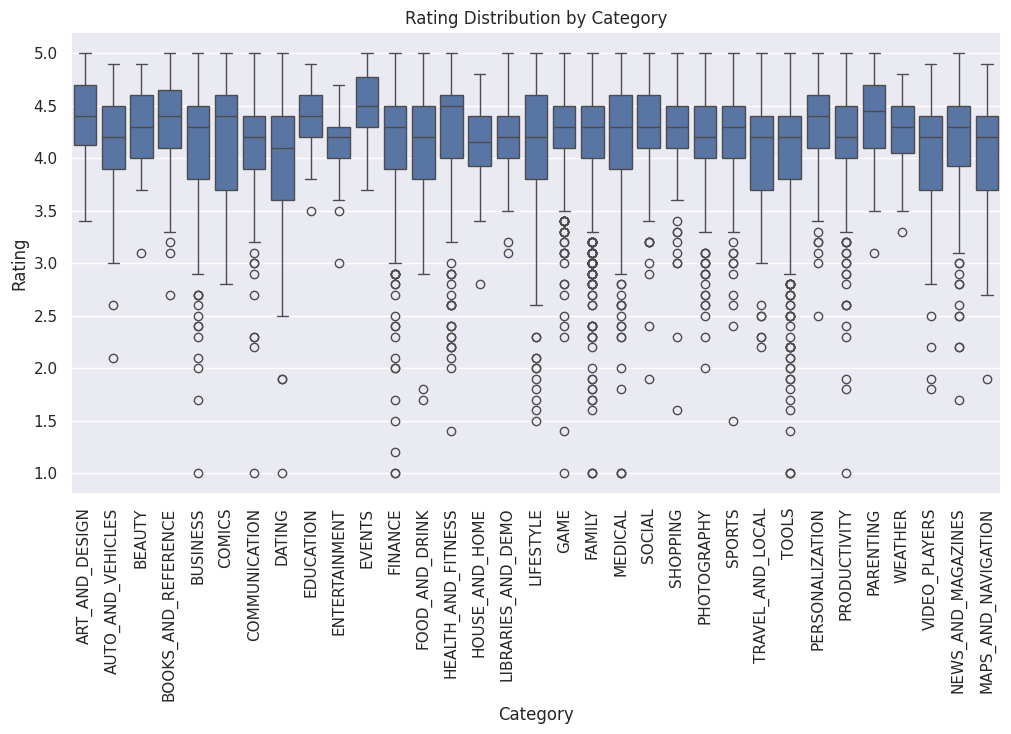

In [660]:
# Create a boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.show()

#### According to this box plot, the distribution of app ratings across categories shows significant differences. Most app ratings are concentrated around the median, however, some categories display noticeable outliers (for example, in the Lifestyle category, there are a few apps with extremely high or low ratings).


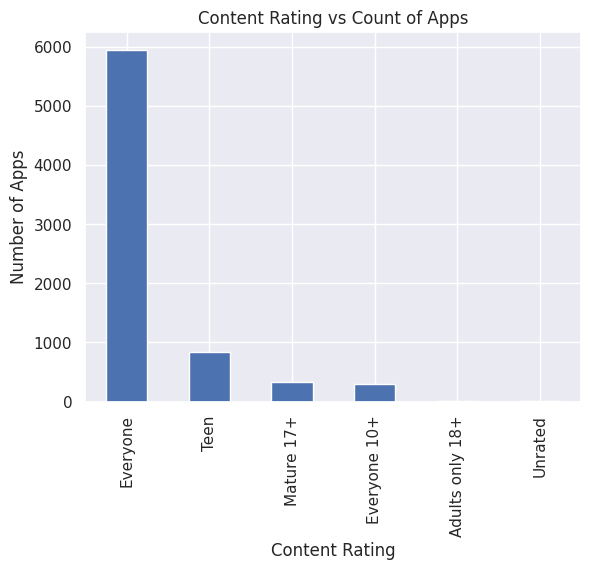

In [661]:
# Create a bar chart
content_rating_counts = df['Content Rating'].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel('Number of Apps')
plt.xlabel('Content Rating')
plt.title('Content Rating vs Count of Apps')
plt.show()

In [662]:
df["lnreviews"] = np.log(df["Reviews"])

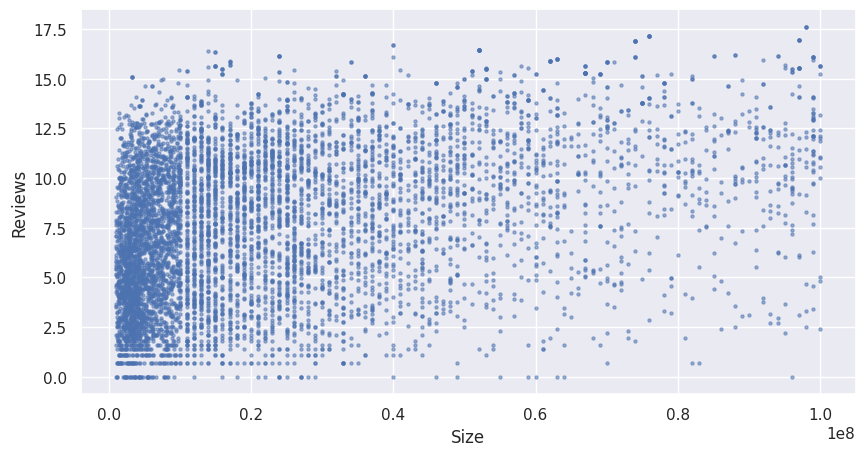

In [663]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Size'], y=df['lnreviews'], s=5, alpha=0.5)
plt.xlabel('Size')
plt.ylabel('Reviews')
plt.show()

#### Looking at the graph, we can see that the number of reviews slightly increases as the size of the app increases. This is an interesting connection, although it is a very weak correlation. It could possibly indicate that people percieve larger apps as more significant, therefore people are more likely to download. Alternatively, larger apps tend to have more features, which would make them more appealing to consumers.

## Conclusion

For our project, we decided to analyze different aspects of the Google Play Apps dataset, which contains details about different apps on the Google Play store. This involved basic descriptives, graphs, and more detailed investigations into different aspects of the data.

The first investigation came into basic descriptives and graphs. We investigated the five-number summaries of the data as well as counts of multiple variables. These insights helped us understand the data better and determine the next steps for investigating.

The next step involved cleaning the data. The data was very messy, with very few variables being numerical. In order to fix this, we needed to remove string characters from the size, type, and price variables to make them easier to understand and perform arithmetic operations. After removing the string characters, the variables are now able to be graphed.

The final step was creating graphs and charts to try and investigate the data on a deeper level. These graphs included bar charts, scatter plots, box and whisker plots, and correlation heatmaps. These charts helped us get a clearer view of the data and understand it in a visual way.

We learned several interesting things from these charts. We learned that the large majority of apps are free, as well as many of the apps being games. We also learned that the majority of apps have high ratings, with most apps having ratings of around 4.5. We also discovered that the number of reviews is correlated with the number of installs.

These results lead to several interesting conclusions. First, they show that most people tend to download games compared to other apps. This is surprising, as games are not the category with the highest number of apps. This means that the popularity of games is disproportionate to the popularity of other app types. Another interesting thing is that most apps are rated highly. This is interesting because the rating curve is very left-skewed. This means that very few apps are rated low and only the worst apps are given a rating worse than four stars. This could possibly be caused by people defaulting to a high review if the app is good, or by potential bot ratings.